In [87]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os 
import glob
import pandas as pd
import seaborn as sns


# LOADING the data

In [2]:
# let's make a function loading the images
'''
os.path.join(path1, path2, ...): 
joins multiple paths together using the appropriate separator for the current operating system.
'''
def load_images(directory:str):
    imgs = []
    day_night = ['day', 'night']
    for DorN in day_night:
        for file in glob.glob(os.path.join(directory, DorN, '*')):
            img = plt.imread(file) 
            # plt.imshow(img)
            if img is None:
                pass
            else:
                # each image would have a label day or night
                imgs.append((img, DorN))
    return imgs







In [3]:
# loading the data
# G:\ComputerVision\CV001\dayAndNight\day_night_images\training
train_images = "G:/ComputerVision/CV001/dayAndNight/day_night_images/training/"
test_images = "G:/ComputerVision/CV001/dayAndNight/day_night_images/test/"

In [4]:
train_imgs = load_images(train_images)
test_imgs = load_images(test_images)


Text(0.5, 1.0, 'day')

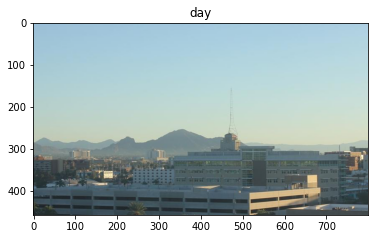

In [5]:

plt.imshow(train_imgs[0][0])
plt.title(train_imgs[0][1])

Text(0.5, 1.0, 'night')

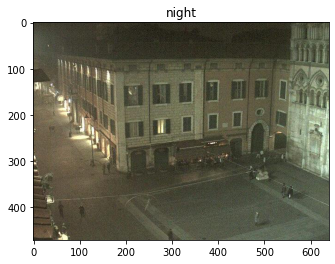

In [6]:
plt.imshow(train_imgs[-1][0])
plt.title(train_imgs[-1][1])

# prepeocessing the images 


### Input
 It's important to make all your images the same size so that they can be sent through the same pipeline of classification steps! Every input image should be in the same format, of the same size, and so on.

In [7]:
# standardization of the images
def standerd(image):
    st = cv2.resize(image, (1100,600))
    return st 


1
0
(600, 1100, 3)


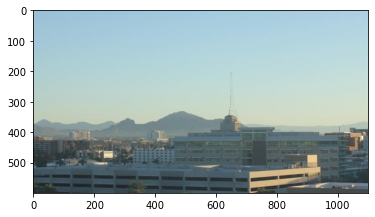

In [8]:
# encoding day and night to => 1, 0
std_train_images = [(standerd(i[0]), int(i[1] == 'day') ) for i in train_imgs]
std_test_images = [(standerd(i[0]), int(i[1] == 'day') ) for i in test_imgs]
# test 
print(std_train_images[0][1]) # day
print(std_train_images[-1][1]) # night
plt.imshow(std_train_images[0][0])
print(std_train_images[0][0].shape)



# Feature extraction

Create a feature that represents the <b>brightness</b> in an image. We'll be extracting the average brightness using HSV colorspace. Specifically, we'll use the **V channel (a measure of brightness)**, add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.

### RGB to HSV 

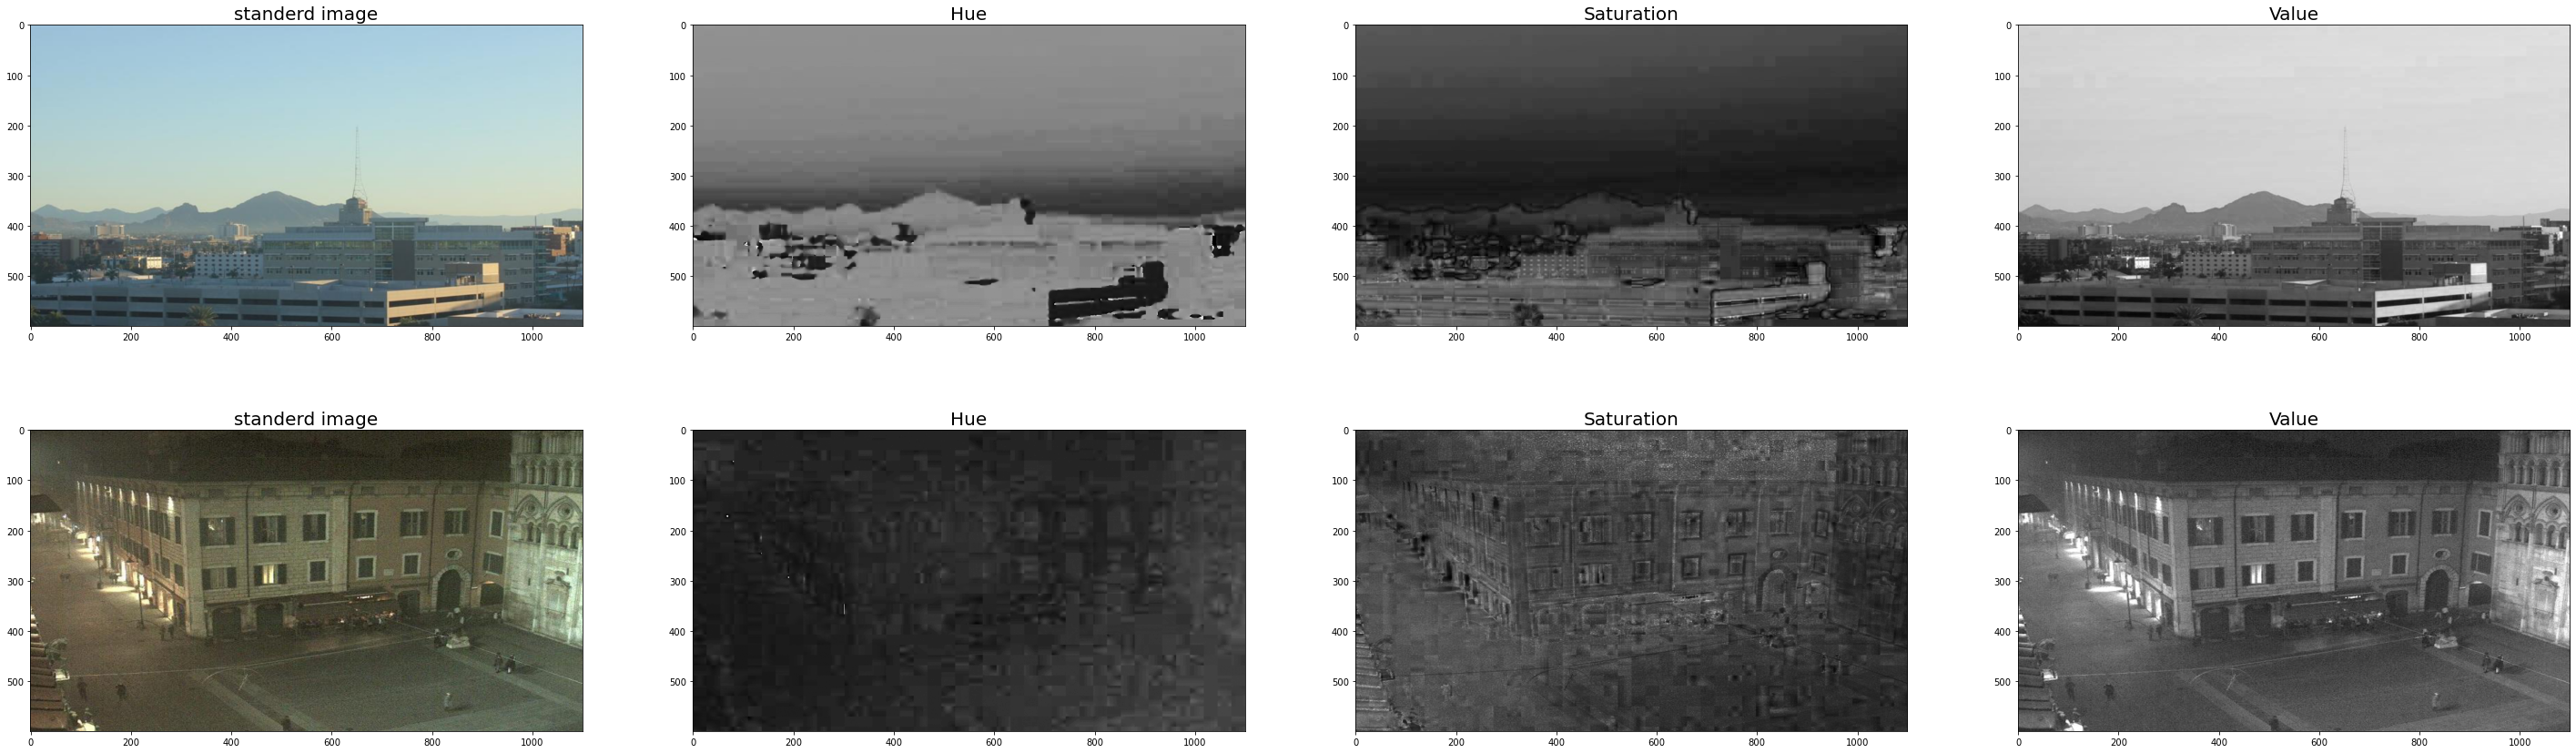

In [29]:
# let's see the effect of hsv on someimage
c = np.copy(std_train_images[0][0])
c_label = 'day' if std_train_images[0][1] else 'night'
c2 = np.copy(std_train_images[-1][0])
c2_label = 'day' if std_train_images[-1][1] else 'night'
# let's make a copy in HSV
c_hsv = cv2.cvtColor(c, cv2.COLOR_RGB2HSV)
c2_hsv = cv2.cvtColor(c2, cv2.COLOR_RGB2HSV)

# hsv channels
copies = [c, c2]
hsv_copies = [c_hsv, c2_hsv]
hs = [i[:, :, 0] for i in hsv_copies]
ss = [i[:, :, 1] for i in hsv_copies]
vs = [i[:, :, 2] for i in hsv_copies]
# let's plot them
fig, axes = plt.subplots(2, 4, figsize = (50, 15))
# fig.subplots_adjust(left=0.1, right=0.4, wspace=0.1, hspace=0.01)
for i in range(2):
    for j in range(4):
        if j == 0:
            # orginal
            axes[i, j].set_title('standerd image', fontsize = 20)
            axes[i, j].imshow(copies[i])
        if j == 1:
            # h
            axes[i, j].set_title('Hue', fontsize = 20)
            axes[i, j].imshow(hs[i], cmap = 'gray')
        if j == 2:
            # s           
            axes[i, j].set_title('Saturation', fontsize = 20)    
            axes[i, j].imshow(ss[i], cmap = 'gray')
        if j == 3:
            # v
            axes[i, j].set_title('Value', fontsize = 20)
            axes[i, j].imshow(vs[i], cmap = 'gray')


## Find the average brightness using the V channel


In [30]:
def ave_brightness(image):
    # 1️⃣ RGB ==> HSV
    hsv_im = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # 2️⃣ sum all pixels in V channels 
    sum_v = np.sum(hsv_im[:, :, 2])
    # 3️⃣ ave Brightness
    area = image.shape[0] * image.shape[1]
    return sum_v/ area
    

In [37]:
# testing the function
print(ave_brightness(c), c.shape, np.sum(c_hsv[:, :, 2]))

175.1298712121212 (600, 1100, 3) 115585715


now I am greedy🤩 let's make more feature extreaction

In [38]:
# function to extract the H and one for s
def ave_H(image):
    # 1️⃣ RGB ==> HSV
    hsv_im = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # 2️⃣ sum all pixels in H channels 
    sum_h = np.sum(hsv_im[:, :, 0])
    # 3️⃣ ave Brightness
    area = image.shape[0] * image.shape[1]
    return sum_h/ area
def ave_s(image):
    # 1️⃣ RGB ==> HSV
    hsv_im = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # 2️⃣ sum all pixels in s channels 
    sum_2 = np.sum(hsv_im[:, :, 1])
    # 3️⃣ ave Brightness
    area = image.shape[0] * image.shape[1]
    return sum_2/ area
# why not gettint the rgb too and latter determine the importance of the features
def R(image):
    sum_r = np.sum(image[:, :, 0])
    return sum_r / (image.shape[0] * image.shape[1])
def G(image):
    sum_r = np.sum(image[:, :, 1])
    return sum_r / (image.shape[0] * image.shape[1])
def B(image):
    sum_r = np.sum(image[:, :, 2])
    return sum_r / (image.shape[0] * image.shape[1])
    


In [53]:
# let's cook our dataset🧑‍🍳 
# image | H | S | brightness | R | G | B
# define the Dictionary
def generateDict(images):
    data = {}

    for i, (image, label) in enumerate(images):
        # let's extract the features
        h = ave_H(image)
        s = ave_s(image)
        v = ave_brightness(image)
        r = R(image)
        g = G(image)
        b = B(image)
        data[i] = {
        "image_id" : i,
        "Hue" : h,
        "Saturation" : s,
        "Value" : v, 
        "Red" : r,
        "Green" : g,
        "Blue" : b,
        "label" : label
        }
    return data

train_df = pd.DataFrame(generateDict(std_train_images))
train_df = train_df.T
# changing the column to be ints instead of floating numbers
train_df["image_id"]  = train_df["image_id"].astype(int)

display(train_df)
#test_df = pd.DataFrame(generateDict(std_test_images))



,image_id,Hue,Saturation,Value,Red,Green,Blue,label
0,0,85.038206,46.300182,175.129871,147.144006,168.655377,170.153224,1.0
1,1,93.701567,58.227488,192.954773,150.589136,177.962983,190.928829,1.0
2,2,52.928173,63.763079,132.141432,120.814977,116.305376,109.434358,1.0
3,3,98.065462,64.864052,199.784797,148.763380,177.650670,198.700642,1.0
4,4,54.874697,82.957508,109.964702,94.435255,95.322659,90.045906,1.0
...,...,...,...,...,...,...,...,...
235,235,63.511988,164.222459,96.890467,96.753373,53.540833,34.216032,0.0
236,236,56.555886,163.213455,95.499470,95.399464,55.745191,33.694223,0.0
237,237,61.435714,162.614148,95.901317,95.770947,52.880761,34.838879,0.0
238,238,54.269874,169.069750,99.698089,99.622500,53.380438,32.976026,0.0


In [71]:
#test dataframe
test_df = pd.DataFrame(generateDict(std_test_images))
test_df = test_df.T
# changing the column to be ints instead of floating numbers
test_df["image_id"]  = test_df["image_id"].astype(int)

display(test_df)

,image_id,Hue,Saturation,Value,Red,Green,Blue,label
0,0,97.133627,65.159517,194.267453,145.056994,173.794108,193.024392,1.0
1,1,52.740589,71.611483,157.844245,143.714839,138.816188,130.399067,1.0
2,2,99.283826,64.912403,201.646592,149.357788,177.184571,200.548750,1.0
3,3,81.138852,56.342847,191.273192,152.747162,172.725876,185.584915,1.0
4,4,78.452070,57.068505,188.152729,151.401788,170.904008,181.017926,1.0
...,...,...,...,...,...,...,...,...
155,155,69.658561,166.453627,91.117608,91.047721,50.167465,33.646311,0.0
156,156,61.324314,165.247303,95.513673,95.312286,52.696888,34.759717,0.0
157,157,25.431379,77.191983,93.836858,93.525538,89.380408,68.680398,0.0
158,158,23.172365,82.758461,88.084102,87.889208,81.800876,63.163186,0.0


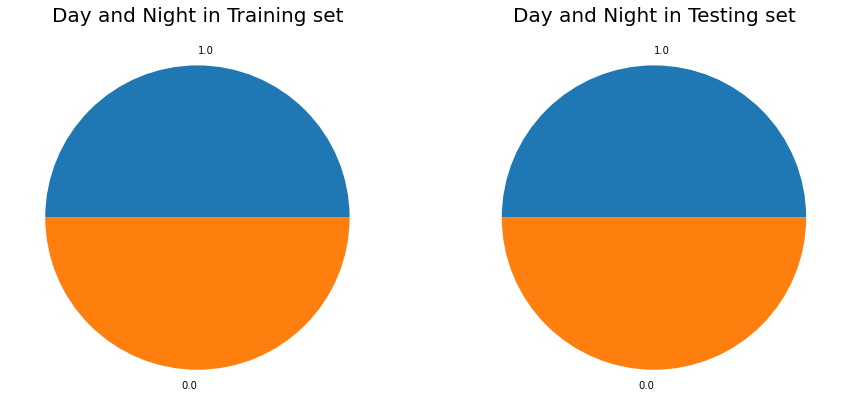

In [79]:
# let's see what is the label distrbution
labelCount = train_df['label'].value_counts()
pie, ax = plt.subplots(1, 2, figsize = (15, 10))
ax[0].set_title("Day and Night in Training set", fontsize=20)
ax[0].pie(labelCount, labels=labelCount.index);
labelCount2 = test_df['label'].value_counts()
ax[1].set_title("Day and Night in Testing set", fontsize=20)
ax[1].pie(labelCount2, labels=labelCount.index);

# balanced


In [81]:
# lets get the train_x, train_y, test_x, test_y
train_x = train_df.iloc[:, 0:-1].values
train_y = train_df.iloc[:, -1].values
test_x = test_df.iloc[:, 0: -1].values
test_y = test_df.iloc[:, -1].values



In [83]:
# ok as I am lazy for now let's do a model that doesn't need to normalize the dataset 
# maybe Decision Forect 🌲 🌲🌲 
from sklearn.ensemble import RandomForestClassifier
forect = RandomForestClassifier(random_state= 42)
forect.fit(train_x, train_y)



RandomForestClassifier(random_state=42)

In [85]:
# making predictions
predictions_test =  forect.predict(test_x)

In [86]:
print(predictions_test)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Accuracy Score : 0.96875
fbeta_score : 0.9587378640776698
Confusion matrix : [[76  4]
 [ 1 79]]


<AxesSubplot:>

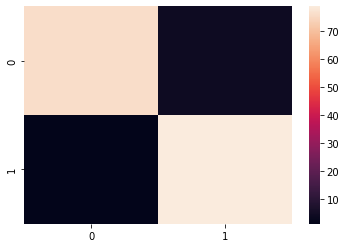

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
print(f"Accuracy Score : {accuracy_score(test_y, predictions_test)}")
print(f"fbeta_score : {fbeta_score(test_y, predictions_test, beta= 0.5)}")
print(f"Confusion matrix : {confusion_matrix(test_y, predictions_test)}")
sns.heatmap(confusion_matrix(test_y, predictions_test))




In [91]:
#hmmm how about this
print(classification_report(test_y, predictions_test))

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        80
         1.0       0.95      0.99      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



In [93]:
# nice we didn't optimze it yet 
# lets optimize the model🌟 
#yahh forest with s I used c doesn't matter
RandomForestClassifier.get_params(forect)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [100]:
# let's do randomsearch for Best parameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV # maybe I  would use it
from sklearn.metrics import make_scorer

newforest = RandomForestClassifier(random_state=42)
par = {
    # 'max_depth': [2, 3, 7, 9, 22],
    # 'n_estimators': [100, 200, 300],
    'n_estimators': [200, 300, 320], 
    'min_samples_split': [4, 6], 
    'min_samples_leaf': [2,3], 
    'max_depth' : [2, 4, 8, 10],
    'warm_start' : [True, False]

}
# before 
scoreM = make_scorer(fbeta_score, beta = 0.5)
randomObj = RandomizedSearchCV(newforest, par, scoring=scoreM)
searchfit = randomObj.fit(train_x, train_y)
best_forest = searchfit.best_estimator_
# making predictions
newforest.fit(train_x, train_y)
predictions = newforest.predict(test_x)
best_predictions = best_forest.predict(test_x)
# noraml report BEFORE

print(classification_report(test_y, predictions))
print('-'*50)

# optimized AFTER
print(classification_report(test_y, best_predictions))



              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        80
         1.0       0.95      0.99      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160

--------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        80
         1.0       0.95      0.99      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



that was useless I am tired and boerd to do any further tries